# Support Vector Machines (SVM) for Predicting Payback of Loans

**Name**:  Conor Brooke  
**Student-ID**:  C00260735  
**Date**:  07/02/2024  
**Link To Notebook Followed**:  [GitHub Repository](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb)  

  
## Notebook Overview

This notebook covers a detailed exploration of Support Vector Machines (SVM), a classification algorithm known for its effectiveness in handling high-dimensional data. The focus is on applying SVM to a loan prediction classification task using a dataset `loan_data`. The analysis incudes various stages, including data understanding, preprocessing, and model development, with an emphasis on understanding SVM concepts such as discriminative classification, decision boundaries, and the kernel trick. Through this exploration, the notebook aims to demonstrate SVM's practical utility in predicting using classification, and offer insights into optimizing the model.



<br>  

> **Note**: This notebook is part of my Data Science Continuous Assessment portfolio. The notebook followed has been enhanced significantly from the original version cloned from GitHub to deepen both theoretical and practical understanding of the underlying machine learning algorithm(s). The differences are documented in the notebooks log to track the evolution of the notebook and analyze the algorithm's performance.

# Notebook Log

## Support Vector Machines - Explained

Support Vector Machines (SVMs) are advanced supervised learning algorithms used for both categorizing data (classification) and predicting outcomes (regression). This section focuses on their application in classification problems using simple scatterplots.

SVMs work by finding the best boundary that separates different categories of data points. They look for a boundary that correctly separates the data into categories and also maximizes the distance (or margin) between the boundary and the nearest data points from each category. 

This approach helps in making the classification as clear as possible, especially when dealing with complex data where the distinction between categories isn't obvious.

### Overview of SVM Using Linear Boundaries

The primary goal of an SVM is to find the optimal separating hyperplane between different classes in the dataset. This hyperplane acts as the decision boundary that categorizes new data points into one of the classes.


Key concepts displayed in the SVM graph include:

- **Decision Boundary**: The line that separates different classes in the dataset. It is chosen to maximize the margin between the classes.
- **Margin**: The distance between the decision boundary and the nearest data points from each class. SVM aims to maximize this margin to improve the model
- **Support Vectors**: Data points that are closest to the decision boundary. These points are critical as they directly influence the position and orientation of the decision boundary.

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate sampe data with 2 features (for easy visualization) and 2 classes
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

Fit the SVM model with a linear kernel

In [301]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

#### Two classes of points that are well separated

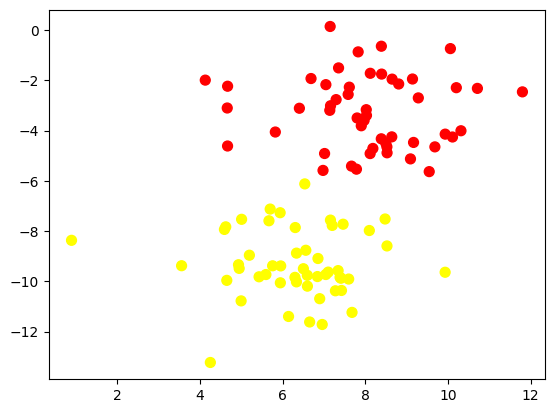

In [302]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Data points

# Determine axis limits
xlim, ylim = plt.gca().get_xlim(), plt.gca().get_ylim()


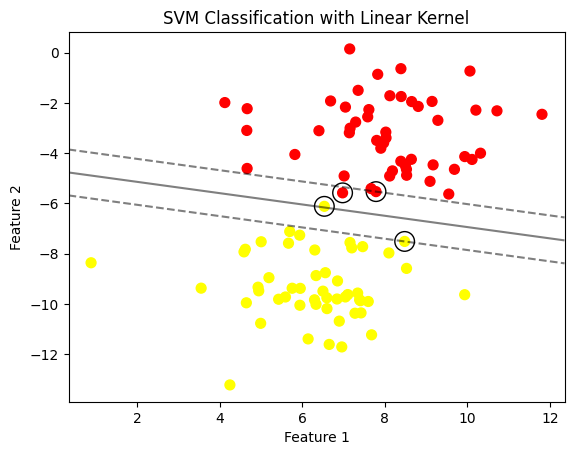

In [303]:
# Generate a grid of points to plot the decision boundary and margins
x_grid_values, y_grid_values = np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30)
meshgrid_y, meshgrid_x = np.meshgrid(y_grid_values, x_grid_values)

# Combine grid points into a single array for model evaluation
decision_function_points = np.vstack([meshgrid_x.ravel(), meshgrid_y.ravel()]).T
decision_boundary_values = model.decision_function(decision_function_points).reshape(meshgrid_x.shape)

# Plot the decision boundary and margins using contour plot
plt.contour(meshgrid_x, meshgrid_y, decision_boundary_values, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight support vectors with larger, outlined points
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200,
            linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Classification with Linear Kernel")
plt.show()


The graph visualizes these concepts with a simple linear SVM model. Data points from two classes are plotted, showing how SVM effectively separates them with a decision boundary while maximizing the margin. Support vectors are shown close to the decision boundary in both yellow and red, demonstrating their role in defining the decision boundary.

## Exploring Non-linear Boundaries with SVMs Using the Kernel Trick

### Non-linear SVM Classification

While linear SVMs are powerful for datasets that are linearly separable, many real-world datasets have complex structures that linear boundaries cannot capture. To tackle such scenarios, SVMs can be extended using the kernel trick, allowing them to find non-linear boundaries.

### The Kernel Trick

The kernel trick is a method that allows linear algorithms to be applied to non-linear problems. It works by mapping the original data into a higher-dimensional space where the data points that are not linearly separable in the original space can be separated linearly. This mapping is done implicitly, avoiding the computational complexity of directly computing the coordinates in the higher-dimensional space.

### Visualizing Non-linear Decision Boundaries

To demonstrate, we'll use a kernel SVM to classify a dataset where the classes are not linearly separable. I'll visualize the non-linear decision boundary that the SVM creates by leveraging the kernel trick.


In [304]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, factor=0.1, noise=0.1, random_state=42)

# Fit the SVM model with RBF kernel
model = SVC(kernel='rbf', C=1.0)
model.fit(X, y)

SVC()

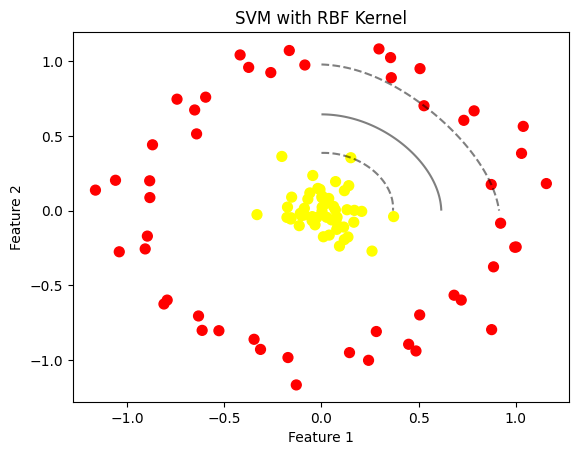

In [305]:
# Create grid to evaluate model
xlim, ylim = plt.gca().get_xlim(), plt.gca().get_ylim()
xx, yy = np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with RBF Kernel")
plt.show()

This approach allows SVMs to effectively classify data with complex patterns, significantly extending their applicability beyond linearly separable datasets.

<br>

## Predicting Who Pays Back Loans using SVM

**Link To Lending-Club Loan Dataset**:  [Lending Club Dataset](https://www.kaggle.com/datasets/sarahvch/predicting-who-pays-back-loans) 

<br>

## Data Understanding

### Initial Data Collection Report
- **Lending-Club Loan Dataset**: This dataset contains loan information from Lending-Club from 2010-2013. Initial observations indicated that the dataset has a high dimensionality.

### Data Description

- Size: 9578 entries
- Number of features: 14
    - 1 Categorical features
    - 12 Continuos features
- Null values: None
- Duplicate rows: 0
- Unique loan purposes: ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement' 'small_business' 'major_purchase' 'educational']


#### Features Breakdown
- `credit.policy`: Indicates whether the borrower meets the credit underwriting criteria of the lender.
- `purpose`: The purpose of the loan (categorical).
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower.
- `log.annual.inc`: The natural log of the annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.
- `inq.last.6mths`: The borrower's number of inquiries by creditors in the last 6 months.
- `delinq.2yrs`: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- `pub.rec`: The number of derogatory public records the borrower has.
- `not.fully.paid`: Indicates whether the loan was fully paid or not (target variable).


### Correlation Insights

- **Positive Correlations**: Features such as `int.rate`, `inq.last.6mths`, and `purpose_small_business` show positive correlations with `not.fully.paid`, indicating a higher probability of loan payback failure as these values increase. `int.rate` shows the highest positive correlation at 0.159552, displaying the impact of interest rates on repayment risks.

- **Negative Correlations**: `fico` and `credit.policy` have negative correlations, suggesting that higher FICO scores and better credit policy are strongly linked to successful loan repayments.


### Exploratory Data Analysis (EDA)

#### General Observations

- **Distribution of FICO Scores by Loan Status**: The histogram reveals a trend where fully paid loans are frequently associated with higher FICO scores. Specifically, the distribution of fully paid loans (denoted as '0') skews to the right, indicating that borrowers with higher FICO scores are more likely to pay off their loans.

- **Loan Purpose vs. Payback Status**: A bar chart comparison across different loan purposes shows a clear difference in payback status. For example, 'debt consolidation' is the most common purpose for taking out loans. Additionally, this category also shows a higher proportion of loans that have been fully paid off, as indicated by the number of '0' values compared to '1', which represents loans not fully paid.

- **Overall Loan Repayment Performance**: An analysis of the loans reveals that out of approximately 9,500 loans, around 8,000 have been fully repaid. This suggests a strong overall tendency towards loan repayment in the dataset.

In [306]:
import seaborn as sns

In [307]:
import pandas as pd

loans = pd.read_csv('Datasets/loan_data.csv')

In [308]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [309]:
print(len(loans))

9578


In [310]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [311]:
#Checking for null values
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [312]:
loans.duplicated().sum()

0

In [313]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [314]:
print("Unique loan purposes:")
print(loans['purpose'].unique())

Unique loan purposes:
['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


#### Distribution of FICO scores by loan status

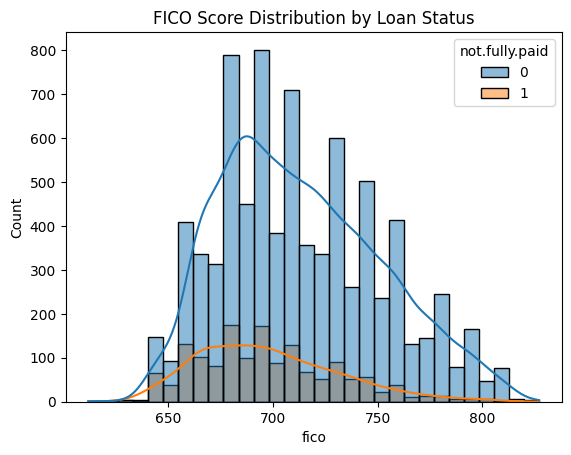

In [315]:
sns.histplot(data = loans, x='fico', hue='not.fully.paid', bins=30, kde=True)
plt.title('FICO Score Distribution by Loan Status')
plt.show()

#### Loan purpose vs. Payback status

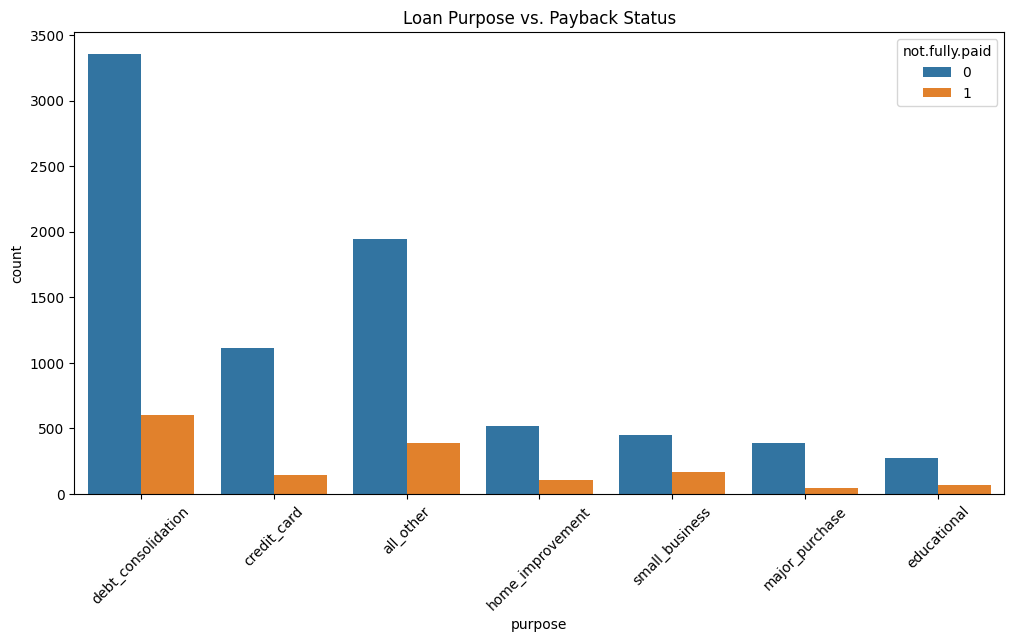

In [316]:
plt.figure(figsize=(12, 6))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')
plt.xticks(rotation=45)
plt.title('Loan Purpose vs. Payback Status')
plt.show()

#### Comparison of Fully Paid vs. Not Fully Paid Loans


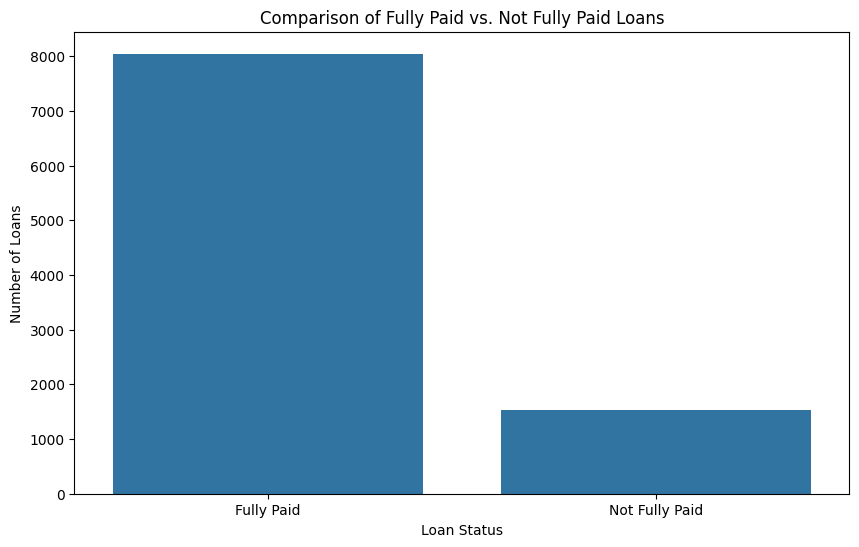

In [317]:
plt.figure(figsize=(10, 6))
sns.countplot(data=loans, x='not.fully.paid')
plt.title('Comparison of Fully Paid vs. Not Fully Paid Loans')
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'])
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

## Data Preparation

In this section, I outline the steps taken to clean and prepare the data for modeling.
### Data Cleaning Steps

1. **Dropping Features with Low Correlation**: I identified features with low correlation values to the loan repayment status, such as `purpose_home_improvement`, `purpose_all_other`, and `delinq.2yrs`. These features showed weak linear relationships with the target variable and were removed to reduce the dataset's dimensionality. This step aims to simplify the model and potentially improve accuracy.

    ```python
    loans_encoded.drop(columns=['purpose_home_improvement', 'purpose_all_other', 'delinq.2yrs'], axis=1)
    ```

2. **Outlier Removal**: To minimize the impact of extreme values on our model, I removed outliers using the Interquartile Range (IQR) method with a multiplier of 2 for both Q1 and Q3. This less stricked approach aims to retain more data while still lowering the influence of outliers (usually 1.5, I used 2 as the dataset is already small).

    ```python
    filtered_loans = loans_encoded[~((loans_encoded[numerical_features] < (Q1 - 2 * IQR)) | (loans_encoded[numerical_features] > (Q3 + 2 * IQR))).any(axis=1)]
    ```

### Feature Engineering and Selection

1. **Dummy Feature Creation**: Since theres categorical data within the model, I created dummy features for each loan purpose. This process increased the dataset's dimensionality, giving a clearer analysis of the impact of loan purposes on repayment.

2. **Scaling**: I applied `StandardScaler` from `sklearn.preprocessing` to standardize our dataset. This scaler adjusts the data to have a mean of 0 and a standard deviation of 1. Additionally, a test scaled set was created to evaluate if scaling improves the model's prediction accuracy.

Using one hot encoding to deal with categorical data, added many more features increasing dimensionality

In [318]:
# Perform one-hot encoding on the 'purpose' column
purpose_dummies = pd.get_dummies(loans['purpose'], prefix='purpose')

# Concatenate the new one-hot encoded columns to the original DataFrame
loans_encoded = pd.concat([loans.drop('purpose', axis=1), purpose_dummies], axis=1)

In [319]:
# Calculate the correlation matrix
correlation_matrix = loans_encoded.corr()

# Get the correlation of all features with 'not.fully.paid'
correlation_with_target = correlation_matrix['not.fully.paid'].sort_values(ascending=False)

print(correlation_with_target)

not.fully.paid                1.000000
int.rate                      0.159552
inq.last.6mths                0.149452
purpose_small_business        0.084460
revol.util                    0.082088
revol.bal                     0.053699
installment                   0.049955
pub.rec                       0.048634
dti                           0.037362
purpose_educational           0.021609
purpose_all_other             0.009233
delinq.2yrs                   0.008881
purpose_home_improvement      0.007272
purpose_debt_consolidation   -0.017543
purpose_major_purchase       -0.028580
days.with.cr.line            -0.029237
log.annual.inc               -0.033439
purpose_credit_card          -0.047136
fico                         -0.149666
credit.policy                -0.158119
Name: not.fully.paid, dtype: float64


Dropping low correalted columns to improve model acuracy

In [320]:
# Drop the columns in loans_encoded
loans_encoded_dropped = loans_encoded.drop(columns=['purpose_home_improvement', 'purpose_all_other', 'delinq.2yrs'], axis=1)

loans_encoded_dropped.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False,True,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,True,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,True,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False,True,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,0,True,False,False,False,False


The IQR method is a common statistical method to find outliers. Outliers are usually considered to be any data points that fall below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR), where Q1 and Q3 are the first and third quartiles, and IQR is the interquartile range (Q3 - Q1). However, 1.5 seems a little too restrictive for this small dataset so I modified the mutliplier to 2

In [321]:
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 
                      'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths']
numerical_features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths']

In [322]:
Q1 = loans_encoded[numerical_features].quantile(0.25)
Q3 = loans_encoded[numerical_features].quantile(0.75)
IQR = Q3 - Q1

In [323]:
IQR

int.rate                 0.036800
installment            268.992500
log.annual.inc           0.732879
dti                     10.737500
fico                    55.000000
days.with.cr.line     2910.000000
revol.bal            15062.500000
revol.util              48.300000
inq.last.6mths           2.000000
dtype: float64

In [324]:
# Determine outliers using IQR
outliers = ((loans_encoded[numerical_features] < (Q1 - 2 * IQR)) | (loans_encoded[numerical_features] > (Q3 + 2 * IQR))).sum()
print(outliers)

int.rate               2
installment            0
log.annual.inc        91
dti                    0
fico                   0
days.with.cr.line    181
revol.bal            624
revol.util             0
inq.last.6mths       313
dtype: int64


In [325]:
# Filtering the dataset to exclude outliers
filtered_loans = loans_encoded[~((loans_encoded[numerical_features] < (Q1 - 2 * IQR)) | (loans_encoded[numerical_features] > (Q3 + 2 * IQR))).any(axis=1)]

In [326]:
print(f"Size: {len(loans_encoded)}")
print(f"Filtered dataset size: {len(filtered_loans)}")

Size: 9578
Filtered dataset size: 8446


Creating a separate dataset with scaled numerical features to see if performance would be improved. This could improve the models accuracy since SVM with RBF kernel is sensitive to the magnitude of the features.

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [328]:
scaledX = filtered_loans.drop(['not.fully.paid'], axis=1)
filteredY = filtered_loans['not.fully.paid']

# Split the data into training and testing sets
scaledX_train, scaledX_test, scaledY_train, scaledY_test = train_test_split(scaledX, filteredY, test_size=0.1, random_state=42)

In [329]:
scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(scaledX)

StandardScaler()

In [330]:
X_train_scaled = scaler.transform(scaledX_train)
X_test_scaled = scaler.transform(scaledX_test)

X_train_scaled

array([[ 0.42458015, -1.44566573,  0.46691826, ..., -0.2582315 ,
        -0.22442564, -0.24951216],
       [ 0.42458015, -0.02840123, -0.05478687, ..., -0.2582315 ,
        -0.22442564, -0.24951216],
       [ 0.42458015,  0.41091256, -0.9623051 , ..., -0.2582315 ,
        -0.22442564, -0.24951216],
       ...,
       [ 0.42458015, -1.69015341, -0.303354  , ..., -0.2582315 ,
        -0.22442564, -0.24951216],
       [ 0.42458015, -0.43333395, -1.01370338, ..., -0.2582315 ,
        -0.22442564, -0.24951216],
       [-2.35526789, -1.08275434,  0.04660565, ..., -0.2582315 ,
        -0.22442564, -0.24951216]])

<br>

## Modeling

### Model Selection

- **Loan Pay Back Classification: Encoded (Without any feature engineering or scaling) Model**:
    Two models were considered: SVC with an RBF kernel and LinearSVC. The choice of SVC with an RBF kernel was due to its capability to handle non-linear relationships. However, without feature engineering or scaling, the model could not effectively differentiate between the classes. LinearSVC was selected as a simpler alternative to see how a basic linear model would perform under the same conditions.

- **Loan Pay Back Classification: SMOTE (with feature engineering and scaling) Model**:
    After applying SMOTE to fix the class imbalance and adding feature scaling to standardize the data, I used an SVC model with an RBF kernel again. The use of SMOTE improved the model's ability to identify the minority class, while scaling helped in optimizing the model's performance by making sure that all features helped more equally to the decision.

- **Loan Pay Back Classification: SMOTE & Threshold Model**:
    The final approach involved further refining the SMOTE dataset by changing the decision threshold of an SVC model, now able to predict probabilities. This method was chosen to fine-tune the model to the minority class, allowing for a better balance between recall and precision.

### Model Building and Tuning

- **Loan Pay Back Classification: Encoded (Without any feature engineering or scaling) Model**:
    - Test set: 20%
    - SVC (RBF kernel): 
      ```
      [[1421    0]
      [ 269    0]]
      ```
      This model predicted all instances as the majority class, indicating a lack of accuracy to the minority class.
    - LinearSVC:
      ```
      [[798 813]
      [143 162]]
      ```
      Despite its simplicity, LinearSVC showed an ability to identify some instances of the minority class, however, with a significant number of misclassifications.

- **Loan Pay Back Classification: SMOTE Model**:
    - Test set: 10%
    - After applying SMOTE:
      ```
      [[510 215]
      [ 52  68]]
      ```
      The use of SMOTE improved the model's ability to detect the minority class, as reflected in the increased number of true positives for class 1.

- **Loan Pay Back Classification: SMOTE & Threshold Model**:
    - Using a probability threshold adjustment on the SMOTE-enhanced dataset:
      ```
      [[496 229]
      [ 46  74]]
      ```
      Adjusting the threshold allowed for an even better balance between detecting both classes, showcasing the model's improved versatility.

### Modeling Challenges

- The primary challenge across the models was addressing the class imbalance, which massively descreased the model's ability to predict the minority class accurately. The application of SMOTE was a crucial step in overcoming this, enabling the models to recognize the minority class more effectively.

- Feature scaling was essential in optimizing the performance of SVM models, especially when combined with SMOTE, to ensure that all features contributed appropriately.

- Choosing the right kernel and adjusting the model's decision threshold were important in fine-tuning the model's sensitivity to the minority class.


In [331]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Below is the SVM model for predicting a loan being payed backed without significant alterations and feature engineering.

##### Preparing the Data

In [332]:
# Define features and target variable
X = loans_encoded.drop('not.fully.paid', axis=1)
y = loans_encoded['not.fully.paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Training the Model:<br>
Using Support Vector Machine (SVM) with kernel rbf (Radial basis function)

In [333]:
# Initialize and train the classifier
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

##### Evaluating the Model

In [334]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1610    1]
 [ 305    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



In [335]:
from sklearn.svm import LinearSVC
model_linear = LinearSVC(random_state=42, max_iter=30000)
model_linear.fit(X_train, y_train)

c:\Users\c_bro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\c_bro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=30000, random_state=42)

In [336]:
# Make predictions
y_pred_linear = model_linear.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

[[798 813]
 [143 162]]
              precision    recall  f1-score   support

           0       0.85      0.50      0.63      1611
           1       0.17      0.53      0.25       305

    accuracy                           0.50      1916
   macro avg       0.51      0.51      0.44      1916
weighted avg       0.74      0.50      0.57      1916



Below is the SVM model for predicting a loan being payed backed with significant alterations, feature engineering and SMOTE(Synthetic Minority Over-sampling Technique).

In [337]:
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, scaledY_train)

SVC(random_state=42)

In [338]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(scaledY_test, y_pred_scaled))
print(classification_report(scaledY_test, y_pred_scaled))

[[720   5]
 [119   1]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.17      0.01      0.02       120

    accuracy                           0.85       845
   macro avg       0.51      0.50      0.47       845
weighted avg       0.76      0.85      0.79       845



In [339]:
from imblearn.over_sampling import SMOTE
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, scaledY_train)

In [340]:
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_smote, y_train_smote)

SVC(random_state=42)

In [341]:
# Make predictions
y_pred_smote = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(scaledY_test, y_pred_smote))
print(classification_report(scaledY_test, y_pred_smote))

[[510 215]
 [ 52  68]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       725
           1       0.24      0.57      0.34       120

    accuracy                           0.68       845
   macro avg       0.57      0.64      0.57       845
weighted avg       0.81      0.68      0.73       845



Implementing Threshold adjustments to further improve the imbalance with the minority class.

In [342]:
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train_smote, y_train_smote)

y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities of the positive class

In [343]:
# Make predictions
y_pred_smote = (y_probs >= 0.45).astype(int)

# Evaluate the model
print(confusion_matrix(scaledY_test, y_pred_smote))
print(classification_report(scaledY_test, y_pred_smote))

[[496 229]
 [ 46  74]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       725
           1       0.24      0.62      0.35       120

    accuracy                           0.67       845
   macro avg       0.58      0.65      0.57       845
weighted avg       0.82      0.67      0.72       845



## Evaluation

### Evaluation Metrics Used

For both models, I utilized the following evaluation metrics from `sklearn.metrics`:

- **Confusion Matrix**: The confusion matrix helps visualize the performance of the algorithm, showing the actual vs. predicted classifications.

- **Classification Report**: The classification report provides a detailed summary of precision, recall, f1-score, and support for each class, along with macro average and weighted average across all classes. 

### Model Performance Results

- **Loan Pay Back Classification: Encoded (Without any feature engineering or scaling) Model**:
    - **SVC (RBF kernel)** showed a strong bias towards predicting all instances as the majority class, indicated by its inability to identify any instances of the minority class (class 1) at all.
    - **LinearSVC** demonstrated some ability to identify the minority class, with significant misclassification, suggesting that linear models might require careful feature selection or transformation to improve performance.

- **Loan Pay Back Classification: SMOTE Model**:
    - The application of **SMOTE** improved the model's ability to detect the minority class, as reflected in the increased recall for class 1. This suggests that fixing class imbalance can significantly improve model bias against minority classes.

- **Loan Pay Back Classification: SMOTE & Threshold Model**:
    - Adjusting the decision threshold further refined the model's performance, particularly in identifying the minority class, which is clear from the improved recall for class 1. This approach allowed for better control over model predictions, improving the balance between precision and recall.

### Model Interpretation

The SVM models' performance varied significantly across the different models, influenced mainly by the clear class imbalance and the addition of techniques like SMOTE and threshold adjustment. 
  
The initial model, which lacked feature engineering or scaling, struggled to identify the minority class, highlighting the challenges of class imbalance. Using SMOTE improved the model's ability to recognize instances of the minority class, demonstrating the power of oversampling techniques in fixing imbalance issues. 
  
The adjustments to the decision threshold allowed for better optimization of model performance, particularly in enhancing recall for the minority class. 

**Possible Improvements**:
    Improvements could be made by exploring more feature engineering and selection techniques to provide the model with more important information. Additionally, experimenting with different kernels and hyperparameter tuning could improve model performance. 
